In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/CVD_Vital_SIgns.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Confusion Matrix:
[[1177    0]
 [  10 3507]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1177
           1       1.00      1.00      1.00      3517

    accuracy                           1.00      4694
   macro avg       1.00      1.00      1.00      4694
weighted avg       1.00      1.00      1.00      4694



<Axes: >

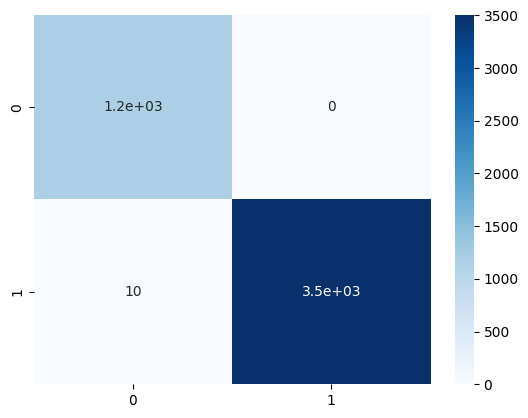

In [5]:
import numpy as np
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

np.set_printoptions(suppress=True)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_rep)

sns.heatmap(cm, annot=True, cmap='Blues')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:00:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[1177    0]
 [   0 3517]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1177
           1       1.00      1.00      1.00      3517

    accuracy                           1.00      4694
   macro avg       1.00      1.00      1.00      4694
weighted avg       1.00      1.00      1.00      4694



<Axes: >

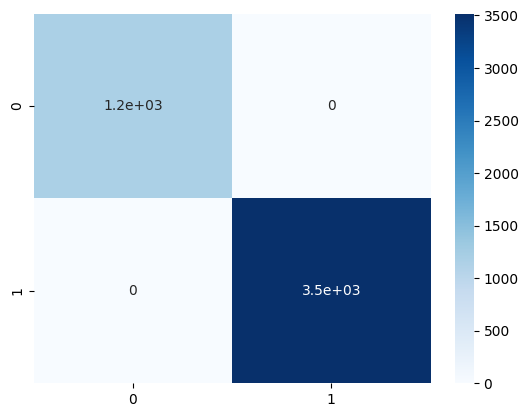

In [7]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

np.set_printoptions(suppress=True)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_rep)

sns.heatmap(cm, annot=True, cmap='Blues')

In [8]:
from sklearn.tree import DecisionTreeClassifier

Confusion Matrix:
[[1177    0]
 [  24 3493]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1177
           1       1.00      0.99      1.00      3517

    accuracy                           0.99      4694
   macro avg       0.99      1.00      0.99      4694
weighted avg       0.99      0.99      0.99      4694



<Axes: >

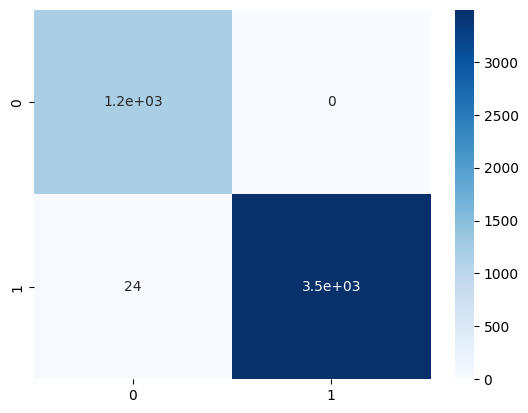

In [9]:
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

np.set_printoptions(suppress=True)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_rep)

sns.heatmap(cm, annot=True, cmap='Blues')